<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/11_Pro_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(%D0%A3%D0%BD%D0%B8%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%82%D0%B5%D1%82_%D0%B8%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B8%D0%BD%D1%82%D0%B5%D0%BB%D0%BB%D0%B5%D0%BA%D1%82%D0%B0)%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Pro

Макс 10 баллов

Провести ряд экспериментов с архитектурой нейронной сети:

Исследовать влияние количества слоев conv2d.

Исследовать влияние количества нейронов (фильтров) в слоях conv2d.

Исследовать влияние MaxPooling2D в сети.

Исследовать влияние Dropout.

Написать выводы по результатам проведенных тестов. 

# Загрузка библиотек

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os
from google.colab import drive

%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Распознавание изображений из набора данных MNIST 


In [ ]:
# mnist загрузка базы
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

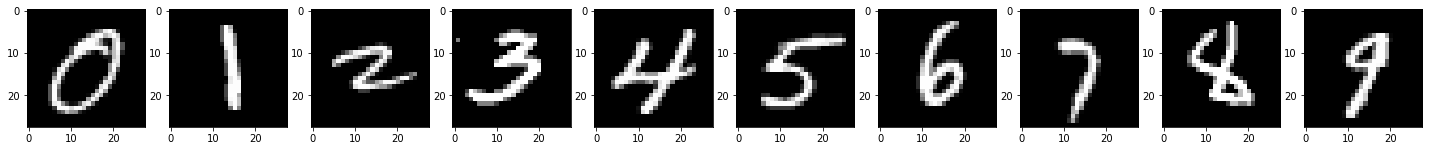

In [ ]:
# Выводим картинки для каждого класса (примеры)
fig,axs = plt.subplots(1, 10, figsize=(25, 3))    #создаем полотно из 10 графиков
for i in range(10):
  label_indexes = np.where(y_train==i)[0]         #получаем список из индексов положений класса i в y_train 
  index = random.choice(label_indexes)            # выбираем рандомно индекс
  img = x_train[index]                            # выбираем картинку из x_train
  axs[i].imshow(Image.fromarray(img), cmap='gray') #отображаем картинку i-тым

plt.show()                                        #показать картинку

In [ ]:
# преобразуем y_train, y_test в ohe
y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test, 10)


In [ ]:
#меняем размерность, добавляем в конце 1, чтобы сверточная сеть понимала, что это черно-белые
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# проверим размерность и глянем на правильных ответах
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


# Функция создания сети + обучение в цикле :


Ищем лучшую модель по условиям "слои-количество нейронов":
- 1,2,3 сверточных слоя
- количество нейронов в слоях от 8 до 150, сгруппированы в списки по слоям

In [ ]:
# Функция создания сети с одним сверточным слоем и разной комбинацией количества нейронов


def createModel_1_level(n_Conv_1, n_Dense):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(n_Conv_1, (3, 3), input_shape=(28, 28, 1), padding='same', activation= 'linear'))
 
  model.add(Flatten())

  #Полносвязный слой для классификации
  model.add(Dense(n_Dense, activation= 'relu')) 

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  return model



In [ ]:
def RunModel():                                                         
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=1000, 
                    epochs=15,
                    validation_split = 0.2,                                       
                    verbose=0)

# Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

# print(scores)
  print("кол-во нейронов в 1 слое Conv2d:", n_Conv_1)
  # print("кол-во нейронов во 2 слое Conv2d: ", n_Conv_2)
  # print("кол-во нейронов в 3 слое Conv2d: ", n_Conv_3)
  print("кол-во нейронов в Dense слое: ", n_Dense )
  
  print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")
  
  

In [ ]:
# for n_Conv_1  in [20, 40, 60, 80, 100]: 
#   for n_Conv_2  in [8, 16, 32, 64, 128]:
#     for n_Conv_3  in [20, 40, 60, 80, 100]:                            
#       for n_Dense in [ 30, 60, 90, 120, 150]:
#         RunModel()


for n_Conv_1  in [20, 40, 60, 80, 100]:
  for n_Dense in [ 30, 60, 90, 120, 150]:
    model = createModel_1_level(n_Conv_1, n_Dense)
    RunModel()
                            
  
      

кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов в Dense слое:  30
Доля верных ответов на тестовых данных, в процентах: 72.44%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов в Dense слое:  60
Доля верных ответов на тестовых данных, в процентах: 88.76%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов в Dense слое:  90
Доля верных ответов на тестовых данных, в процентах: 93.17%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов в Dense слое:  120
Доля верных ответов на тестовых данных, в процентах: 92.39%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов в Dense слое:  150
Доля верных ответов на тестовых данных, в процентах: 94.09%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов в Dense слое:  30
Доля верных ответов на тестовых данных, в процентах: 75.65%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов в Dense слое:  60
Доля верных ответов на тестовых данных, в процентах: 91.18%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов в Dense слое:  90
Доля верных ответо

Промежуточный вывод: 

Dense слой менее 90 дает меньшую точность , оставим 90, 120 и 150 нейронов для дальнейших экспериментов. 

Лучший результат  точночти НС с одним сверточным слоем 94,46% = Conv2D (100) + Dense (150)

In [ ]:
# Функция создания сети с двумя  сверточными слоями и разной комбинацией количества нейронов
def createModel_2_level(n_Conv_1, n_Conv_2, n_Dense):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(n_Conv_1, (3, 3), input_shape=(28, 28, 1), padding='same', activation= 'linear'))
 
  #второй сверточный слой
  model.add(Conv2D(n_Conv_2, (3, 3), padding = 'same', activation = 'linear'))  
  
  model.add(Flatten())

  #Полносвязный слой для классификации
  model.add(Dense(n_Dense, activation= 'relu')) 

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  return model

In [ ]:
def RunModel():                                                         
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=1000, 
                    epochs=15,
                    validation_split = 0.2,                                       
                    verbose=0)

# Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

# print(scores)
  if round(scores[1] * 100, 4) > 90:
    print("кол-во нейронов в 1 слое Conv2d:", n_Conv_1)
    print("кол-во нейронов во 2 слое Conv2d: ", n_Conv_2)
    # print("кол-во нейронов в 3 слое Conv2d: ", n_Conv_3)
    print("кол-во нейронов в Dense слое: ", n_Dense )
    
    print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

In [ ]:
for n_Conv_1  in [20, 40, 60, 80, 100]: 
  for n_Conv_2  in [8, 64, 128]:
    for n_Dense in [ 90, 120, 150]:
      model = createModel_2_level(n_Conv_1, n_Conv_2, n_Dense)
      RunModel()

кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в Dense слое:  90
Доля верных ответов на тестовых данных, в процентах: 94.08%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Доля верных ответов на тестовых данных, в процентах: 94.47%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в Dense слое:  150
Доля верных ответов на тестовых данных, в процентах: 95.1%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  64
кол-во нейронов в Dense слое:  90
Доля верных ответов на тестовых данных, в процентах: 93.29%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  64
кол-во нейронов в Dense слое:  120
Доля верных ответов на тестовых данных, в процентах: 93.95%
кол-во нейронов в 1 слое Conv2d: 20
кол-во нейронов во 2 слое Conv2d:  64
кол-во нейронов в Dense слое:  150
Доля верных ответов на тестовых данных, в процентах:

In [ ]:
def createModel_3_level(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(n_Conv_1, (3, 3), input_shape=(28, 28, 1), padding='same', activation= 'linear'))
 
  #второй сверточный слой
  model.add(Conv2D(n_Conv_2, (3, 3), padding = 'same', activation = 'linear'))
  
  #третий сверточный слой
  model.add(Conv2D(n_Conv_3, (3, 3), padding = 'same', activation = 'linear'))
 
  model.add(Flatten())

  #Полносвязный слой для классификации
  model.add(Dense(n_Dense, activation= 'relu')) 

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  return model

In [ ]:
def RunModel():                                                         
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=1000, 
                    epochs=15,
                    validation_split = 0.2,                                       
                    verbose=0)

# Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

# print(scores)
  if round(scores[1] * 100, 4) > 90:
    print("кол-во нейронов в 1 слое Conv2d:", n_Conv_1)
    print("кол-во нейронов во 2 слое Conv2d: ", n_Conv_2)
    print("кол-во нейронов в 3 слое Conv2d: ", n_Conv_3)
    print("кол-во нейронов в Dense слое: ", n_Dense )
    
    print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

После эксперимента очевидно, что 20 нейронов на 1 сверточном слое показали худшие результаты, на втором сверточном слое лучшие результаты на 8 нейронов. Исходя из опыта , делаем третий сверточный слой с количеством нейронов в диапазоне 8-12, чтобы точно убедиться в выводах добавим 100 и проверим гипотезу о том, что на внутрених сверточных слоях нам не нужно много нейронов (применительно для этой задачи).

In [ ]:
for n_Conv_1  in [40, 60, 80, 100]: 
  for n_Conv_2  in [8]:
    for n_Conv_3  in [8, 10, 12, 100]:
      for n_Dense in [ 90, 120, 150]:
        model = createModel_3_level(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense)
        RunModel()

кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  90
Доля верных ответов на тестовых данных, в процентах: 94.35%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Доля верных ответов на тестовых данных, в процентах: 95.51%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  150
Доля верных ответов на тестовых данных, в процентах: 95.15%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  10
кол-во нейронов в Dense слое:  90
Доля верных ответов на тестовых данных, в процентах: 94.9%
кол-во нейронов в 1 слое Conv2d: 40
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  10
кол-во нейронов в Dense слое:  120
Доля верных ответов на тестовых данных, в

Эксперимент с тремя сверточными слоями дал несущественноеувеличение точности. Отмечена тенденция с лучшими показателями точности на моделях с большим количество нейронов на входе 80-100, с небольшим количество нейронов в скрытом сверточном слое 8-12 и с большим количеством нейронов в препоследнем полносвязном слое 120-150.
Попробуем провести эксперимент со слоем Dropout. За основу возьмем самые успешные варианты моделей с 3мя слоями. 

In [ ]:
def createModel_3_level_Dropout(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense, drop):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(n_Conv_1, (3, 3), input_shape=(28, 28, 1), padding='same', activation= 'linear')) 
  #Слой регуляризации Dropout
  model.add(Dropout(drop))  

  #второй сверточный слой
  model.add(Conv2D(n_Conv_2, (3, 3), padding = 'same', activation = 'linear'))
  #Слой регуляризации Dropout
  model.add(Dropout(drop))  

  #третий сверточный слой
  model.add(Conv2D(n_Conv_3, (3, 3), padding = 'same', activation = 'linear'))
 
  model.add(Flatten())

  #Полносвязный слой для классификации
  model.add(Dense(n_Dense, activation= 'relu')) 

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  return model

In [ ]:
def RunModel():                                                         
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=1000, 
                    epochs=15,
                    validation_split = 0.2,                                       
                    verbose=0)

# Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

# print(scores)
  if round(scores[1] * 100, 4) > 90:
    print("кол-во нейронов в 1 слое Conv2d:", n_Conv_1)
    print("кол-во нейронов во 2 слое Conv2d: ", n_Conv_2)
    print("кол-во нейронов в 3 слое Conv2d: ", n_Conv_3)
    print("кол-во нейронов в Dense слое: ", n_Dense )
    print("Dropout: ", drop )
    print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

In [ ]:
for n_Conv_1  in [80, 100]: 
  for n_Conv_2  in [8]:
    for n_Conv_3  in [8, 12]:
      for n_Dense in [120, 150]:
        for drop in [0.1, 0.2, 0.3]:
          model = createModel_3_level_Dropout(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense, drop)
          RunModel()

кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Dropout:  0.1
Доля верных ответов на тестовых данных, в процентах: 96.29%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Dropout:  0.2
Доля верных ответов на тестовых данных, в процентах: 95.44%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Dropout:  0.3
Доля верных ответов на тестовых данных, в процентах: 95.6%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  150
Dropout:  0.1
Доля верных ответов на тестовых данных, в процентах: 96.05%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в De

После эксперимента с Dropout ясно, что на точность почти не влияет в конкретном случае.
Попробуем Макспуллинг

In [ ]:
def createModel_3_level_MP(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense, mp):
  model = Sequential()

  #Первый сверточный слой
  model.add(Conv2D(n_Conv_1, (3, 3), input_shape=(28, 28, 1), padding='same', activation= 'linear')) 
  # Первый слой подвыборки
  model.add(MaxPooling2D(pool_size= mp))
 

  #второй сверточный слой
  model.add(Conv2D(n_Conv_2, (3, 3), padding = 'same', activation = 'linear'))
   # Второй слой подвыборки
  model.add(MaxPooling2D(pool_size= mp))
 
  #третий сверточный слой
  model.add(Conv2D(n_Conv_3, (3, 3), padding = 'same', activation = 'linear'))
 
  model.add(Flatten())

  #Полносвязный слой для классификации
  model.add(Dense(n_Dense, activation= 'relu')) 

  #выходной полносвязный слой
  model.add(Dense(10, activation='softmax'))

  #компилируем сеть
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  
  
  return model

In [ ]:
def RunModel():                                                         
  
  history= model.fit(x_train, 
                    y_train, 
                    batch_size=1000, 
                    epochs=15,
                    validation_split = 0.2,                                       
                    verbose=0)

# Вычисляем результаты сети на тестовом наборе
# scores состоит из двух знанчений
# scores[0] - loss сети на тестовой выборке
# scores[1] - процент правильно распознанных примеров на тестовой выборке
  scores = model.evaluate(x_test, y_test, verbose=0)

# print(scores)
  if round(scores[1] * 100, 4) > 90:
    print("кол-во нейронов в 1 слое Conv2d:", n_Conv_1)
    print("кол-во нейронов во 2 слое Conv2d: ", n_Conv_2)
    print("кол-во нейронов в 3 слое Conv2d: ", n_Conv_3)
    print("кол-во нейронов в Dense слое: ", n_Dense )
    print("Maxpooling: ", mp )
    print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

In [ ]:
for n_Conv_1  in [80, 100]: 
  for n_Conv_2  in [8]:
    for n_Conv_3  in [8, 12]:
      for n_Dense in [120, 150]:
        for mp in [(3,3), (2,2)]:
          model = createModel_3_level_MP(n_Conv_1, n_Conv_2, n_Conv_3, n_Dense, mp)
          RunModel()

кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Maxpooling:  (3, 3)
Доля верных ответов на тестовых данных, в процентах: 96.76%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  120
Maxpooling:  (2, 2)
Доля верных ответов на тестовых данных, в процентах: 97.91%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  150
Maxpooling:  (3, 3)
Доля верных ответов на тестовых данных, в процентах: 96.93%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d:  8
кол-во нейронов в Dense слое:  150
Maxpooling:  (2, 2)
Доля верных ответов на тестовых данных, в процентах: 97.88%
кол-во нейронов в 1 слое Conv2d: 80
кол-во нейронов во 2 слое Conv2d:  8
кол-во нейронов в 3 слое Conv2d

MaxPooling дал заметное увеличение точности , особенно хорошо отработало сжатие (2,2). Лучшая точность составила 97.91% ( 1 слой Conv2D = 80, 2 слой Conv2D = 8, 3 слой Conv2D = 8,  Dense = 120.

In [ ]:
# Таблица результатов точности на тестовой выборке , %
import pandas as pd
columns = ['Наименование эксперимента', 'Точность, %']
data = [['1 слой Conv2D, 20-60 нейронов', 72.44],
        ['1 слой Conv2D, 80-100 нейронов', 94.46],
        ['2 слоя Conv2D , 8 нейронов в скрытом', 96.25], 
        ['3 слоя Conv2D,8 нейронов в скрытом', 96.41],
       ['Dropout, 0.1', 96.47],
       ['MaxPooling, (2,2)', 97.91],
        ]
df = pd.DataFrame(data, columns = columns)
df

,Наименование эксперимента,"Точность, %"
0,"1 слой Conv2D, 20-60 нейронов",72.44
1,"1 слой Conv2D, 80-100 нейронов",94.46
2,"2 слоя Conv2D , 8 нейронов в скрытом",96.25
3,"3 слоя Conv2D,8 нейронов в скрытом",96.41
4,"Dropout, 0.1",96.47
5,"MaxPooling, (2,2)",97.91


Вывод: 

Во входном слое и полносвязном лучше всего отработали модели с большим количеством нейронов. 

Добавление еще 2 слоев повысило точность почти на 2%.

В скрытых слоях наибольшая точность достигнута с минимальным количеством нейронов. 

Применение Dropout не дало существенных улучшений, а MaxPooling повысил точность на 1,5%. 

Резюме: 

Полезными экспериментами стали : 

- увеличение количества нейронов во входящем слое и в полносвязном

- добавление скрытых слоев свертки с минимальным количеством нейронов

- MaxPooling (2,2)

